In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [162]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [163]:
df.shape

(29922, 6)

In [164]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [165]:
df["ordered_at"] = pd.to_datetime(df["ordered_at"])
df[['Value','price']] = df.price.str.split("$",expand=True,)
df[['Value2','line_total']] = df.line_total.str.split("$",expand=True,)
df["price"] = pd.to_numeric(df["price"])
df["line_total"] = pd.to_numeric(df["line_total"])
df.drop('Value', axis=1,inplace=True)
df.drop('Value2', axis=1,inplace=True)
df.head()


,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5


In [166]:
df.head()
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [167]:
df[df.duplicated()].shape[0]

538

In [168]:
df.drop_duplicates(keep = False,inplace=True)
df.shape

(28855, 6)

In [169]:
df.isnull().sum()

order_id         0
name          1474
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [170]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [171]:
df.dropna(inplace=True)
df.shape
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [172]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

27

In [173]:
df[df['line_total'] < 0].shape[0]

276

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [174]:
df.loc[df.line_total != (df['price'] * df['quantity']), "line_total"] = df.price * df.quantity
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

0

In [175]:
indexNegative = df[df['line_total'] < 0].index
df.drop(indexNegative , inplace=True)
df[df['line_total'] < 0].shape[0]

0

In [176]:
df.describe()

,order_id,price,quantity,line_total
count,27105.000000,27105.000000,27105.000000,27105.000000
mean,14995.510238,2.512931,1.999779,5.029183
std,2888.511015,1.058688,0.819353,3.084671
min,10000.000000,0.500000,1.000000,0.500000
25%,12502.000000,1.500000,1.000000,2.500000
50%,14978.000000,2.500000,2.000000,4.500000
75%,17509.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [177]:
df['category'] = df['name'].str.extract(r'"(.*)"')
df.head()


,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0,SORBET


In [178]:
df['name'] = df['name'].str.replace(r'"(.*)"', '', regex=True)
df

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET
...,...,...,...,...,...,...,...
29817,19997,Waffle Cone,2018-07-28 17:40:40,4.0,3,12.0,CONE
29818,19997,Blood Orange,2018-07-28 17:40:40,2.5,3,7.5,SORBET
29819,19998,Lychee,2018-07-28 18:21:44,3.0,1,3.0,SORBET
29820,19998,Rocky Road,2018-07-28 18:21:44,3.5,1,3.5,ICE CREAM


#### Analysis, finally!

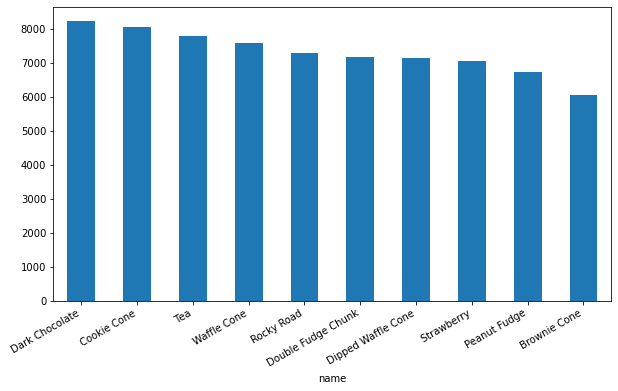

In [179]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()